# 1. Import and Install Dependencies

In [1]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
import time
import mediapipe as mp

In [2]:
#!python -V  # 3.10.4

# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model - make our detection 
mp_drawing = mp.solutions.drawing_utils # Drawing utilities - make our drawings

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [7]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections # (FACEMESH_CONTOURS, FACEMESH_LIPS, FACEMESH_FACE_OVAL)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [8]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(0,0,255), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(0,0,255), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(0,0,255), thickness=2, circle_radius=2), 
                             mp_drawing.DrawingSpec(color=(0,255,0), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(0,0,255), thickness=2, circle_radius=2), 
                             mp_drawing.DrawingSpec(color=(0,255,0), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(0,0,255), thickness=2, circle_radius=2), 
                             mp_drawing.DrawingSpec(color=(0,255,0), thickness=2, circle_radius=2)
                             ) 

In [9]:
# Check the video properties
cap2 = cv2.VideoCapture(0)

print('video frame width = ',cap2.get(cv2.CAP_PROP_FRAME_WIDTH))
print('video frame height = ', cap2.get(cv2.CAP_PROP_FRAME_HEIGHT))

# frame rate being used for frame extraction
print('frame rate = ', cap2.get(cv2.CAP_PROP_FPS))

# frame count in video
print('frame count in video = ', cap2.get(cv2.CAP_PROP_FRAME_COUNT))

video frame width =  640.0
video frame height =  480.0
frame rate =  30.0
frame count in video =  -1.0


In [10]:
def video_resizing(frame, w, h):
    
    # resizing image
    width = int(w)
    height = int(h)
    dimensions = (width,height)
    
    return cv2.resize(frame, dimensions, interpolation=cv2.INTER_AREA)

In [11]:
def video_rescaling(frame, scale):
    
    # sclaing image
    width = int(frame.shape[1] * scale)
    height = int(frame.shape[0] * scale)
    dimensions = (width,height)
    
    return cv2.resize(frame, dimensions, interpolation=cv2.INTER_AREA)

In [12]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        #frame = cv2.resize(frame, (512, 384))

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        #print(results)
        
        #draw_landmarks(image, results)
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        image = video_rescaling(image, 1.30)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [12]:
cap.release()
cv2.destroyAllWindows()

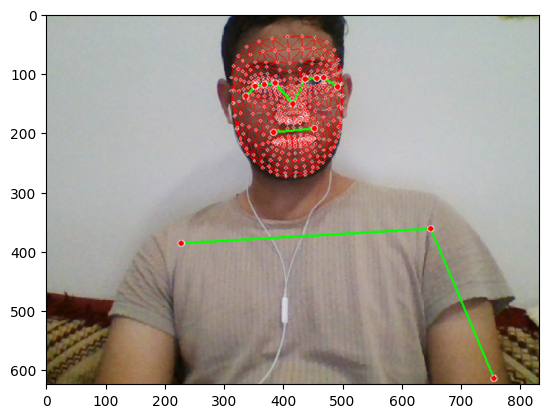

In [14]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [10]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

# 4. Setup Folders for Collection

In [62]:
# # create a main folder for collection
# if not os.path.exists(os.path.join('Resources', 'My Sample Data','Test1')):
#     os.makedirs(os.path.join('Resources', 'My Sample Data','Test1'))

In [63]:
# [30 videos x No. of actions, 30 frames per video, 1662 datapoints per frame]

In [64]:
# for action in actions: 
#     for sequence in range(no_sequences):
#         try: 
#             os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
#         except:
#             pass

In [65]:
# add folders to the existing sign folders

In [11]:
DATA_PATH = os.path.join('Resources', 'My Sample Data','Data Collection')
#actions = np.array(['NoSign','hello','you','work','where','how','your','day','b','o','me','live','university'])
actions = np.array(['live'])
sequence_length = 25

# Folder start
start_folder = 0
# end folder
end_folder = 10

In [95]:
for action in actions: 
    for sequence in range(start_folder,end_folder):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    cv2.waitKey(2000)
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        blank_screen = np.zeros((480,640,3), dtype="uint8")
        cv2.imshow('OpenCV Feed', blank_screen)
        cv2.putText(blank_screen, 'Action: {}'.format(action), (170,210), 
                   cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0,255,0), 2, cv2.LINE_AA)
        cv2.imshow('OpenCV Feed', blank_screen)
        cv2.waitKey(2000)
        
        #for sequence in range(no_sequences):
        for sequence in range(start_folder,end_folder):
        #for sequence in range(end_folder):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                # print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (17,14), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(1000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (17,14), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [97]:
cap.release()
cv2.destroyAllWindows()

# Preprocess Data - Multiple Persons

In [12]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [68]:
sequence_length_short = ([i for i in range(sequence_length) if i%2==0])

In [ ]:
actions = np.array(['NoSign','hello','you','work','where','how','your','day','b','o'])
label_map = {label:num for num, label in enumerate(actions)}
no_sequences = 200
sequence_length = 25

DATA_PATH = os.path.join('Resources','Demo','Aamir','Data Collection')
sequences1, labels1 = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
    #for sequence in range(no_sequences):
        window = []
        for frame_num in sequence_length_short:
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences1.append(window)
        labels1.append(label_map[action])
print('Done -1')
        
DATA_PATH = os.path.join('Resources','Demo','Adam','Data Collection')
sequences2, labels2 = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences2.append(window)
        labels2.append(label_map[action])
print('Done -2')

DATA_PATH = os.path.join('Resources','Demo','Ayesha','Data Collection')
sequences3, labels3 = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences3.append(window)
        labels3.append(label_map[action])
print('Done -3')

DATA_PATH = os.path.join('Resources','Demo','Mehrin','Data Collection')
sequences4, labels4 = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences4.append(window)
        labels4.append(label_map[action])
print('Done -4')

In [ ]:
X1 = np.array(sequences1)
X2 = np.array(sequences2)
X3 = np.array(sequences3)
X4 = np.array(sequences4)

X_final = np.append(np.append(np.append(X1, X2, axis=0), X3,axis=0), X4,axis=0)

In [35]:
X1.shape

(960, 25, 1662)

In [36]:
X_final.shape

(1920, 25, 1662)

In [37]:
y = np.array(labels1+labels1+labels3+labels4)  #+labels2+labels3)
y_final = to_categorical(y).astype(int)

In [38]:
y.shape

(1920,)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.05)

In [40]:
# actions = np.array(['NoSign','hello','thanks','please','sorry','you','work','where'])
# label_map = {label:num for num, label in enumerate(actions)}

In [41]:
# label_map

# 7. Build and Train LSTM Neural Network

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint

In [27]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(25,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [28]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [75]:
checkpoint_filepath = os.path.join('Demo Models',"Model_10ws_4p.h5")
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='loss', # or 'categorical_accuracy' 'loss'
    mode='min', # or 'max' 'min'
    save_best_only=True)

In [76]:
#model.fit(X_train, y_train, epochs=100, callbacks=[model_checkpoint_callback])
model.fit(X_train, y_train, epochs=200, callbacks=[model_checkpoint_callback])
#model.fit(X_train, y_train, epochs=1000, batch_size=80, callbacks=[model_checkpoint_callback])

Epoch 1/200
57/57 [==============================] - 7s 78ms/step - loss: 1.9738 - categorical_accuracy: 0.2297 0s - loss: 2.0137 - cate
Epoch 2/200
57/57 [==============================] - 4s 78ms/step - loss: 1.6201 - categorical_accuracy: 0.3415
Epoch 3/200
57/57 [==============================] - 4s 77ms/step - loss: 1.4213 - categorical_accuracy: 0.3688
Epoch 4/200
57/57 [==============================] - 4s 78ms/step - loss: 1.3226 - categorical_accuracy: 0.4410
Epoch 5/200
57/57 [==============================] - 4s 77ms/step - loss: 0.7926 - categorical_accuracy: 0.6989
Epoch 6/200
57/57 [==============================] - 4s 78ms/step - loss: 0.5239 - categorical_accuracy: 0.7837
Epoch 7/200
57/57 [==============================] - 4s 78ms/step - loss: 0.5816 - categorical_accuracy: 0.8219
Epoch 8/200
57/57 [==============================] - 4s 78ms/step - loss: 0.3645 - categorical_accuracy: 0.9054
Epoch 9/200
57/57 [==============================] - 4s 77ms/step - loss: 1.315

57/57 [==============================] - 4s 72ms/step - loss: 0.0373 - categorical_accuracy: 0.9891
Epoch 146/200
57/57 [==============================] - 4s 72ms/step - loss: 0.0572 - categorical_accuracy: 0.9835
Epoch 147/200
57/57 [==============================] - 4s 71ms/step - loss: 0.0674 - categorical_accuracy: 0.9754
Epoch 148/200
57/57 [==============================] - 4s 72ms/step - loss: 0.0449 - categorical_accuracy: 0.9834
Epoch 149/200
57/57 [==============================] - 4s 72ms/step - loss: 0.0375 - categorical_accuracy: 0.9888
Epoch 150/200
57/57 [==============================] - 4s 72ms/step - loss: 0.0437 - categorical_accuracy: 0.9831
Epoch 151/200
57/57 [==============================] - 4s 72ms/step - loss: 0.0311 - categorical_accuracy: 0.9926
Epoch 152/200
57/57 [==============================] - 4s 72ms/step - loss: 0.0807 - categorical_accuracy: 0.9810
Epoch 153/200
57/57 [==============================] - 4s 71ms/step - loss: 0.0434 - categorical_accur

In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 25, 64)            442112    
_________________________________________________________________
lstm_7 (LSTM)                (None, 25, 128)           98816     
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 264       
Total params: 596,840
Trainable params: 596,840
Non-trainable params: 0
________________________________________________

# 8. Make Predictions

In [55]:
res = model.predict(X_test)

In [56]:
test_num = 4

In [57]:
print('Expected: ',actions[np.argmax(res[test_num])])
print('Predicted: ',actions[np.argmax(y_test[test_num])])

Expected:  work
Predicted:  you


# 9. Save Weights

In [58]:
#model.save('Model Weights\model_test3_train2.h5') # creates a HDF5 file 'my_model.h5'
#model.load_weights('Saved Best Models\test7_model.h5')

In [14]:
from tensorflow.keras.models import load_model
model = load_model('Demo Models/Model_13ws_4p_5fps_new.h5')

In [86]:
# import keras
# new_model = keras.models.load_model('Demo Models/Model_10ws_4p_2.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [27]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, classification_report

In [62]:
yhat = model.predict(X_test)

In [63]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [64]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[85,  0],
        [ 7,  4]],

       [[86,  0],
        [10,  0]],

       [[77,  7],
        [ 2, 10]],

       [[68, 14],
        [ 4, 10]],

       [[79,  5],
        [ 7,  5]],

       [[76,  7],
        [ 0, 13]],

       [[82,  2],
        [ 5,  7]],

       [[84,  0],
        [ 0, 12]]], dtype=int64)

In [65]:
accuracy_score(ytrue, yhat)

0.6354166666666666

In [78]:
print(classification_report(ytrue, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7
           2       0.80      1.00      0.89         4
           3       1.00      0.88      0.93         8
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         5

    accuracy                           0.98        42
   macro avg       0.97      0.98      0.97        42
weighted avg       0.98      0.98      0.98        42



# 11. Test in Real Time

In [15]:
actions = np.array(['NoSign','hello','you','work','where','how','your','day','b','o','me','live','university'])
sequence_length = 5

In [16]:
colors = [(245,117,16)]*len(actions)
#colors = [(245,117,16), (117,245,16), (16,117,245),(16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,50+num*30), (int(prob*100), 80+num*30), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 75+num*30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [33]:
#actions = np.array(['NoSign','hello','thanks','please','sorry','you','work','where'])

In [34]:
#actions[-3:]

In [18]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        #frame = cv2.resize(frame, (512, 384))

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        #print(results)
        
        #draw_landmarks(image, results)
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        #image = video_rescaling(image, 1.30)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

## Realtime prediction

In [24]:
#actions = np.array(['NoSign','please', 'yourewelcome', 'sorry', 'hello', 'thanks', 'iloveyou'])

# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.80

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        #print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-sequence_length:]
        
        if len(sequence) == sequence_length:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            #sentence.append(actions[np.argmax(res)])
                            vals, counts = np.unique(predictions[-8:], return_counts=True)
                            if vals[0]==predictions[-1] and counts[0]>5:
                                sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

1/1 [==============================] - 0s 39ms/step
NoSign
1/1 [==============================] - 0s 194ms/step
NoSign
1/1 [==============================] - 0s 29ms/step
day
1/1 [==============================] - 0s 29ms/step
day
1/1 [==============================] - 0s 35ms/step
me
1/1 [==============================] - 0s 47ms/step
me
1/1 [==============================] - 0s 40ms/step
me
1/1 [==============================] - 0s 33ms/step
me
1/1 [==============================] - 0s 41ms/step
me
1/1 [==============================] - 0s 33ms/step
me
1/1 [==============================] - 0s 30ms/step
live
1/1 [==============================] - 0s 39ms/step
NoSign
1/1 [==============================] - 0s 32ms/step
NoSign
1/1 [==============================] - 0s 29ms/step
NoSign
1/1 [==============================] - 0s 32ms/step
NoSign
1/1 [==============================] - 0s 32ms/step
NoSign
1/1 [==============================] - 0s 34ms/step
NoSign
1/1 [=======================

1/1 [==============================] - 0s 30ms/step
NoSign
1/1 [==============================] - 0s 29ms/step
NoSign
1/1 [==============================] - 0s 29ms/step
NoSign
1/1 [==============================] - 0s 29ms/step
NoSign
1/1 [==============================] - 0s 42ms/step
NoSign
1/1 [==============================] - 0s 40ms/step
day
1/1 [==============================] - 0s 32ms/step
day
1/1 [==============================] - 0s 27ms/step
day
1/1 [==============================] - 0s 29ms/step
day
1/1 [==============================] - 0s 31ms/step
me
1/1 [==============================] - 0s 39ms/step
day
1/1 [==============================] - 0s 35ms/step
me
1/1 [==============================] - 0s 34ms/step
me
1/1 [==============================] - 0s 40ms/step
me
1/1 [==============================] - 0s 35ms/step
me
1/1 [==============================] - 0s 35ms/step
hello
1/1 [==============================] - 0s 32ms/step
hello
1/1 [=============================

1/1 [==============================] - 0s 42ms/step
NoSign
1/1 [==============================] - 0s 28ms/step
NoSign
1/1 [==============================] - 0s 38ms/step
NoSign
1/1 [==============================] - 0s 32ms/step
NoSign
1/1 [==============================] - 0s 32ms/step
NoSign
1/1 [==============================] - 0s 35ms/step
o
1/1 [==============================] - 0s 34ms/step
o
1/1 [==============================] - 0s 29ms/step
o
1/1 [==============================] - 0s 38ms/step
o
1/1 [==============================] - 0s 36ms/step
NoSign
1/1 [==============================] - 0s 40ms/step
NoSign
1/1 [==============================] - 0s 40ms/step
NoSign
1/1 [==============================] - 0s 36ms/step
NoSign
1/1 [==============================] - 0s 30ms/step
NoSign
1/1 [==============================] - 0s 46ms/step
NoSign
1/1 [==============================] - 0s 45ms/step
live
1/1 [==============================] - 0s 41ms/step
day
1/1 [=================

NoSign
1/1 [==============================] - 0s 26ms/step
NoSign
1/1 [==============================] - 0s 28ms/step
NoSign
1/1 [==============================] - 0s 33ms/step
NoSign
1/1 [==============================] - 0s 27ms/step
NoSign
1/1 [==============================] - 0s 28ms/step
NoSign
1/1 [==============================] - 0s 31ms/step
NoSign
1/1 [==============================] - 0s 28ms/step
NoSign
1/1 [==============================] - 0s 28ms/step
NoSign
1/1 [==============================] - 0s 33ms/step
NoSign
1/1 [==============================] - 0s 34ms/step
NoSign
1/1 [==============================] - 0s 33ms/step
NoSign
1/1 [==============================] - 0s 31ms/step
day
1/1 [==============================] - 0s 38ms/step
day
1/1 [==============================] - 0s 29ms/step
NoSign
1/1 [==============================] - 0s 36ms/step
NoSign
1/1 [==============================] - 0s 28ms/step
NoSign
1/1 [==============================] - 0s 32ms/step
NoS

1/1 [==============================] - 0s 31ms/step
NoSign
1/1 [==============================] - 0s 32ms/step
NoSign
1/1 [==============================] - 0s 35ms/step
NoSign
1/1 [==============================] - 0s 36ms/step
you
1/1 [==============================] - 0s 38ms/step
you
1/1 [==============================] - 0s 39ms/step
you
1/1 [==============================] - 0s 29ms/step
you
1/1 [==============================] - 0s 30ms/step
you
1/1 [==============================] - 0s 33ms/step
day
1/1 [==============================] - 0s 26ms/step
me
1/1 [==============================] - 0s 30ms/step
day
1/1 [==============================] - 0s 32ms/step
day
1/1 [==============================] - 0s 36ms/step
day
1/1 [==============================] - 0s 32ms/step
day
1/1 [==============================] - 0s 34ms/step
day
1/1 [==============================] - 0s 39ms/step
day
1/1 [==============================] - 0s 39ms/step
day
1/1 [==============================] - 0

NoSign
1/1 [==============================] - 0s 32ms/step
NoSign
1/1 [==============================] - 0s 32ms/step
NoSign
1/1 [==============================] - 0s 28ms/step
NoSign
1/1 [==============================] - 0s 29ms/step
NoSign
1/1 [==============================] - 0s 45ms/step
NoSign
1/1 [==============================] - 0s 28ms/step
NoSign
1/1 [==============================] - 0s 30ms/step
NoSign
1/1 [==============================] - 0s 33ms/step
NoSign
1/1 [==============================] - 0s 34ms/step
NoSign
1/1 [==============================] - 0s 31ms/step
NoSign
1/1 [==============================] - 0s 31ms/step
NoSign
1/1 [==============================] - 0s 28ms/step
NoSign
1/1 [==============================] - 0s 28ms/step
NoSign
1/1 [==============================] - 0s 29ms/step
NoSign
1/1 [==============================] - 0s 28ms/step
NoSign
1/1 [==============================] - 0s 33ms/step
NoSign
1/1 [==============================] - 0s 36ms/st

1/1 [==============================] - 0s 26ms/step
how
1/1 [==============================] - 0s 39ms/step
how
1/1 [==============================] - 0s 39ms/step
how
1/1 [==============================] - 0s 36ms/step
how
1/1 [==============================] - 0s 37ms/step
how
1/1 [==============================] - 0s 37ms/step
me
1/1 [==============================] - 0s 34ms/step
me
1/1 [==============================] - 0s 36ms/step
day
1/1 [==============================] - 0s 36ms/step
o
1/1 [==============================] - 0s 36ms/step
how
1/1 [==============================] - 0s 32ms/step
how
1/1 [==============================] - 0s 34ms/step
how
1/1 [==============================] - 0s 37ms/step
work
1/1 [==============================] - 0s 40ms/step
work
1/1 [==============================] - 0s 39ms/step
work
1/1 [==============================] - 0s 41ms/step
work
1/1 [==============================] - 0s 29ms/step
work
1/1 [==============================] - 0s 31ms/

1/1 [==============================] - 0s 30ms/step
NoSign
1/1 [==============================] - 0s 31ms/step
NoSign
1/1 [==============================] - 0s 32ms/step
NoSign


In [20]:
cap.release()
cv2.destroyAllWindows()